# Possum Head length prediction with Support Vector Regression (Feature Skull Width)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load dataset

In [2]:
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
X = df.iloc[:, 6].values
y = df.iloc[:, 5].values
print(X)
print(y)

[60.4 57.6 60.  57.1 56.3 54.8 58.2 57.6 56.3 58.  57.2 55.6 59.9 57.6
 57.6 56.  67.7 55.7 55.4 56.3 58.1 58.5 56.1 54.9 58.5 59.  54.5 56.8
 56.  54.4 54.1 56.7 54.6 55.7 57.9 59.3 54.8 56.  51.5 55.  57.  54.1
 55.5 51.5 55.9 54.4 54.8 63.2 59.2 56.4 59.6 61.  58.1 63.  63.2 61.5
 59.4 64.2 62.8 57.7 59.  58.  56.4 56.5 57.4 55.8 57.6 56.  55.6 56.4
 57.6 52.4 52.3 52.  58.1 56.8 56.2 51.  50.  52.6 56.  54.  53.8 54.6
 56.2 53.2 60.7 58.  58.4 54.6 59.6 56.3 54.  57.6 56.6 55.7 53.1 68.6
 56.2 56.  54.7 55.  55.2 59.9]
[ 94.1  92.5  94.   93.2  91.5  93.1  95.3  94.8  93.4  91.8  93.3  94.9
  95.1  95.4  92.9  91.6  94.7  93.5  94.4  94.8  95.9  96.3  92.5  94.4
  95.8  96.   90.5  93.8  92.8  92.1  92.8  94.3  91.4  90.6  94.4  93.3
  89.3  92.4  84.7  91.   88.4  85.3  90.   85.1  90.7  91.4  90.1  98.6
  95.4  91.6  95.6  97.6  93.1  96.9 103.1  99.9  95.1  94.5 102.5  91.3
  95.7  91.3  92.   96.9  93.5  90.4  93.3  94.1  98.   91.9  92.8  85.9
  82.5  88.7  93.8  92.4  93.6  8

## Data preprocessing - check for missing data

In [4]:
print(df['skullw'].isnull().any())
print(df['skullw'].isnull().sum())

False
0


In [5]:
print(df['hdlngth'].isnull().any())
print(df['hdlngth'].isnull().sum())

False
0


In [6]:
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

## Histogram showing value distribution of head length and skull width

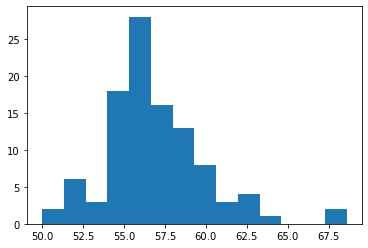

In [7]:
plt.hist(X, bins=14)
plt.show()

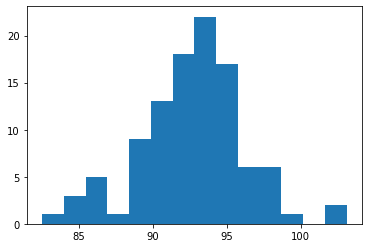

In [8]:
plt.hist(y, bins=14)
plt.show()

In [23]:
# exploring values for skull width
print(max(df['skullw']))
print(df[df['skullw'] > 65.0])

68.6
    case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
16    17     1    Vic   f  1.0     94.7    67.7      89.5   36.5      73.2   
97    98     7  other   m  5.0     93.2    68.6      84.0   35.0      65.6   

    earconch   eye  chest  belly  
16      53.2  14.7   29.0   31.0  
97      44.3  14.5   28.5   32.0  


In [25]:
# exploring values for head length
print(max(df['hdlngth']))
print(df[df['hdlngth'] > 100.0])

103.1
    case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
54    55     4  other   m  2.0    103.1    63.2      92.5   38.0      72.5   
58    59     4  other   m  2.0    102.5    62.8      96.0   40.0      73.2   

    earconch   eye  chest  belly  
54      44.9  16.4   30.5   36.0  
58      44.5  14.7   32.0   36.0  


## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [11]:
print(X)
print(y)

[[ 1.13488322]
 [ 0.23119716]
 [ 1.00578521]
 [ 0.06982464]
 [-0.18837137]
 [-0.67248891]
 [ 0.42484417]
 [ 0.23119716]
 [-0.18837137]
 [ 0.36029516]
 [ 0.10209915]
 [-0.41429289]
 [ 0.97351071]
 [ 0.23119716]
 [ 0.23119716]
 [-0.28519488]
 [ 3.49092188]
 [-0.38201839]
 [-0.47884189]
 [-0.18837137]
 [ 0.39256967]
 [ 0.52166768]
 [-0.25292038]
 [-0.6402144 ]
 [ 0.52166768]
 [ 0.68304019]
 [-0.76931241]
 [-0.02699886]
 [-0.28519488]
 [-0.80158692]
 [-0.89841042]
 [-0.05927336]
 [-0.73703791]
 [-0.38201839]
 [ 0.32802066]
 [ 0.77986369]
 [-0.67248891]
 [-0.28519488]
 [-1.73754748]
 [-0.6079399 ]
 [ 0.03755014]
 [-0.89841042]
 [-0.44656739]
 [-1.73754748]
 [-0.31746938]
 [-0.80158692]
 [-0.67248891]
 [ 2.03856928]
 [ 0.74758919]
 [-0.15609687]
 [ 0.8766872 ]
 [ 1.32853023]
 [ 0.39256967]
 [ 1.97402027]
 [ 2.03856928]
 [ 1.48990274]
 [ 0.8121382 ]
 [ 2.3613143 ]
 [ 1.90947127]
 [ 0.26347166]
 [ 0.68304019]
 [ 0.36029516]
 [-0.15609687]
 [-0.12382237]
 [ 0.16664815]
 [-0.34974388]
 [ 0.23119

## Splitting the dataset into training set and testset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Training the SVR model on the training dataset

In [13]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting the test results

In [14]:
y_pred = sc_y.inverse_transform(regressor.predict(X_test))
print(y_pred)

[90.0518811  93.62669791 96.65887946 92.43378294 87.40533166 95.27450515
 92.79049397 92.13736696 95.61001473 89.85463874 93.24841579 87.2262854
 98.25746485 93.24841579 93.24841579 89.23834191 92.21816106 94.22343915
 91.85889186 92.36564047 85.90823245 91.75218614 92.87731692 93.73481524
 88.60543215 92.68687058]


## Predicting the training set results (for visualisation)

In [15]:
y_train_pred = sc_y.inverse_transform(regressor.predict(X_train))
print(y_train_pred)

[93.84856411 97.82914115 92.29401447 86.47578427 92.49920565 92.84408478
 95.95531058 86.25560364 98.51185201 92.68687058 91.51541167 93.33521584
 90.24363664 94.95229196 93.24841579 96.48277    93.24841579 92.29401447
 91.63779847 89.23834191 92.36564047 92.13736696 91.85889186 92.81234247
 85.90823245 90.60793023 91.85889186 98.24507181 97.34795974 93.52414861
 92.13736696 98.79834319 95.95531058 91.75218614 95.44080607 90.77932803
 93.73481524 92.94464435 92.62498285 87.24707707 96.41596124 92.13736696
 92.36564047 90.24363664 92.56268162 93.24841579 85.97024866 92.36564047
 89.85463874 92.43378294 90.9429695  91.24585359 92.43378294 93.73481524
 92.29401447 86.16455474 86.14405911 94.95229196 92.13736696 89.02784674
 90.60793023 90.9429695  91.95832122 98.72996634 96.48277    89.02784674
 94.09294256 93.24841579 93.62669791 90.60793023 94.22343915 90.24363664
 93.62669791 90.42919289 92.13736696 93.08865356 98.24507181 92.05096032]


## Invert Feature Scaling

In [16]:
X_train = sc_X.inverse_transform(X_train)
X_test = sc_X.inverse_transform(X_test)
y_train = sc_y.inverse_transform(y_train)
y_test = sc_y.inverse_transform(y_test)

## Calculate r2-Score

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.47552187908133436

## Visualising the training set results

[]

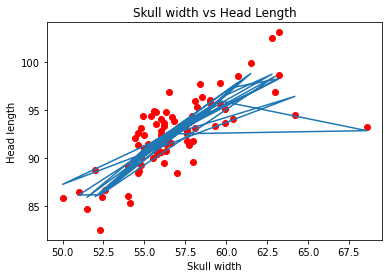

In [18]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, y_train_pred)
plt.title('Skull width vs Head Length')
plt.xlabel('Skull width')
plt.ylabel('Head length')
plt.plot()

## Visualising the test set results

[]

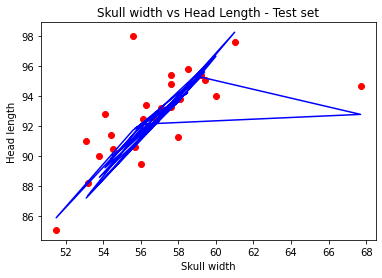

In [19]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Skull width vs Head Length - Test set')
plt.xlabel('Skull width')
plt.ylabel('Head length')
plt.plot()